MANIPULATING PIXELS:

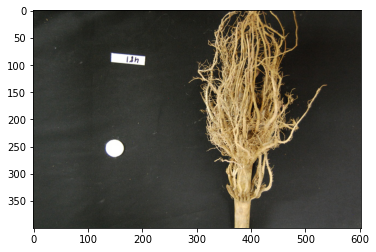

In [1]:
#Suppose we are interested in this maize root cluster image. We want to be able to focus our program’s
#attention on the roots themselves, while ignoring the black background.
'''
Since the image is stored as an array of numbers, we can simply look through the array for pixel colour 
values that are less than some threshold value. This process is called thresholding.
Here, though, we will look at a simple and elegant NumPy method for thresholding. Let us develop a program 
that keeps only the pixel colour values in an image that have value greater than or equal to 128. This 
will keep the pixels that are brighter than half of “full brightness”, i.e. pixels that do not belong to 
the black background. We will start by reading the image and displaying it.
'''
import skimage.io
from matplotlib import pyplot as plt
# read input image
image=skimage.io.imread(r"C:/Users/DEEP/Machine Learning/images/maize-root-cluster.jpg")
# display original image
fig,ax=plt.subplots()
plt.imshow(image)

'\n128 corresponds to gray\nThe NumPy command to ignore all low-intensity pixels is image[image<128]=0. Every pixel colour value \nin the whole 3-dimensional array with a value less that 128 is set to zero. In this case, the result is an \nimage in which the extraneous background detail has been removed.\n'

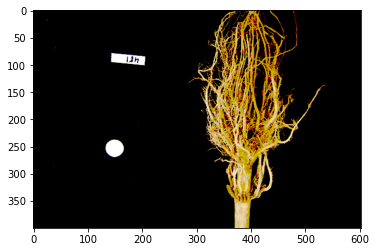

In [2]:
# keep only high-intensity pixels
image[image<128]=0
# display modified image
fig,ax=plt.subplots()
plt.imshow(image)
'''
128 corresponds to gray
The NumPy command to ignore all low-intensity pixels is image[image<128]=0. Every pixel colour value 
in the whole 3-dimensional array with a value less that 128 is set to zero. In this case, the result is an 
image in which the extraneous background detail has been removed.
'''

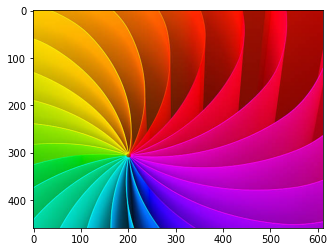

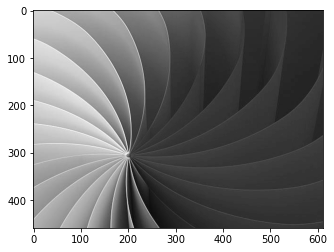

In [3]:
'''
Converting colour images to grayscale
It is often easier to work with grayscale images, which have a single channel, instead of colour images, 
which have three channels. Skimage offers the function skimage.color.rgb2gray() to achieve this. This 
function adds up the three colour channels in a way that matches human colour perception, see the skimage 
documentation for details. It returns a grayscale image with floating point values in the range from 
0 to 1. We can use the function skimage.util.img_as_ubyte() in order to convert it back to the original 
data type and the data range back 0 to 255. Note that it is often better to use image values represented by 
floating point values, because using floating point numbers is numerically more stable.
'''
#this command doesnt work for png images
#m1
import skimage.io
import skimage.color
# read input image
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/colorlayer.jpg")
# display original image
fig,ax=plt.subplots()
plt.imshow(image)
# convert to grayscale and display
gray_image=skimage.color.rgb2gray(image)
fig,ax=plt.subplots()
plt.imshow(gray_image,cmap="gray")

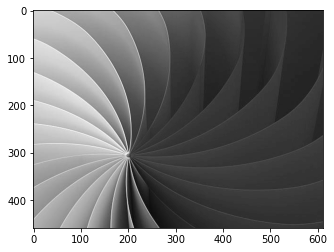

In [4]:
import skimage.io
import skimage.color
from matplotlib import pyplot as plt
#read input image based on filemname parameters
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/colorlayer.jpg",as_gray=True)
#display grayscale image
fig,ax=plt.subplots()
plt.imshow(image,cmap="gray")

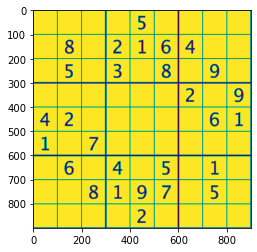

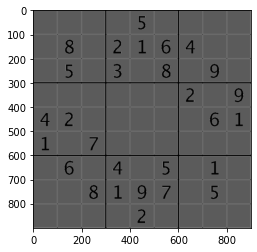

In [5]:
import skimage.io
import skimage.color
from matplotlib import pyplot as plt
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/sudoku.png",as_gray=True)
fig,ax=plt.subplots()
plt.imshow(image)
#channging high intensity pixel values >0.78 to 0.25
image[image>0.7]=0.25
fig,ax=plt.subplots()
plt.imshow(image,cmap="gray")

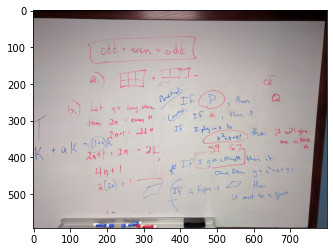

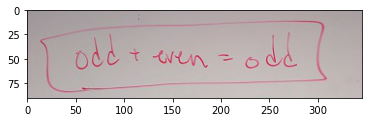

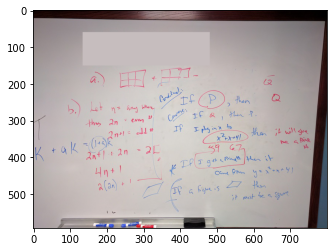

In [6]:
#ACCESSING VIA SLICING
'''
skimage images are stored as NumPy arrays, so we can use array slicing to select rectangular areas of an 
image. Then, we can save the selection as a new image, change the pixels in the image, and so on. It is 
important to remember that coordinates are specified in (ry, cx) order and that colour values are specified 
in (r, g, b) order when doing these manipulations.
'''
#Python script demonstrating image modification and creation via
#NumPy array slicing.
import skimage.io
# load and display original image
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/board.jpg")
fig,ax=plt.subplots()
plt.imshow(image)
#use array slicing to create a new image with our selected area and then display the 
#new image. Notice the coordinates or the pixel axis of the image plotted . Its 
#rough estimation of coordinates can help us to draw sa box on the selected odd and even box
# extract, display, and save sub-image
clip=image[60:151,135:481,:]
fig,ax=plt.subplots()
plt.imshow(clip)
skimage.io.imsave(fname="C:/Users/DEEP/Machine Learning/images/clip.tif",arr=clip)
#We can also change the values in an image, as shown next.
# replace clipped area with sampled color
color=image[330, 90]
image[60:151,135:481]=color
fig,ax=plt.subplots()
plt.imshow(image)

MASKING: Often we wish to select only a portion of an image to analyze, and ignore the rest. Creating a rectangular sub-image with slicing is one option for simple cases. Another option is to create another special image, of the same size as the original, with white pixels indicating the region to save and black pixels everywhere else. Such an image is called a mask. In preparing a mask, we sometimes need to be able to draw a shape - a circle or a rectangle, say - on a black image. skimage provides tools to do that.

In [7]:
'''
Now, suppose we want to analyze only the area of the image containing the roots themselves; we do not 
care to look at the kernels, or anything else about the plants. Further, we wish to exclude the frame of 
the container holding the seedlings as well. Hovering over the image with our mouse, could tell us that 
the upper-left coordinate of the sub-area we are interested in is (44, 357), while the lower-right 
coordinate is (720, 740). These coordinates are shown in (x, y) order.
'''

'\nNow, suppose we want to analyze only the area of the image containing the roots themselves; we do not \ncare to look at the kernels, or anything else about the plants. Further, we wish to exclude the frame of \nthe container holding the seedlings as well. Hovering over the image with our mouse, could tell us that \nthe upper-left coordinate of the sub-area we are interested in is (44, 357), while the lower-right \ncoordinate is (720, 740). These coordinates are shown in (x, y) order.\n'

True


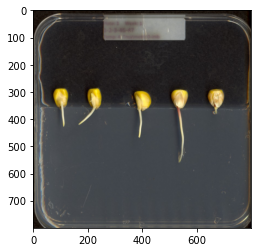

In [8]:
import skimage.io
import skimage.draw
import numpy as np
import matplotlib.pyplot as plt
# Load and display the original image
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/maize-seedlings.jpg")
fig,ax=plt.subplots()
plt.imshow(image)

'''
NumPy allows indexing of images/arrays with “boolean” arrays of the same size. Indexing with a boolean 
array is also called mask indexing. The “pixels” in such a mask array can only take two values: 
True or False. When indexing an image with such a mask, only pixel values at positions where the mask is 
True are accessed. But first, we need to generate a mask array of the same size as the image. Luckily, 
the NumPy library provides a function to create just such an array.
'''
#Create the basic mask
mask=np.ones(shape=image.shape[0:2],dtype="bool")
'''
The first argument to the ones() function is the shape of the original image, so that our mask will be 
exactly the same size as the original. Notice, that we have only used the first two indices of our shape. 
We omitted the channel dimension. Indexing with such a mask will change all channel values simultaneously. 
The second argument, dtype = "bool", indicates that the elements in the array should be booleans - i.e., 
values are either True or False. Thus, even though we use np.ones() to create the mask, its pixel values 
are in fact not 1 but True. You could check this, e.g., by print(mask[0, 0]).
'''
print(mask[0, 0])

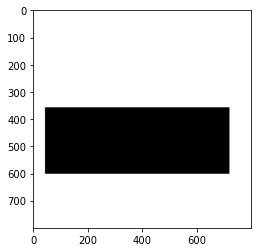

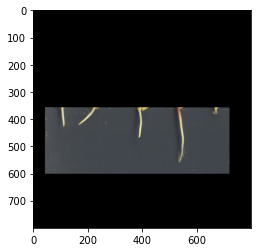

In [9]:
# Draw filled rectangle on the mask image
rr,cc=skimage.draw.rectangle(start=(357, 44),end=(600, 720))
mask[rr,cc]=False
# Display mask image
fig,ax=plt.subplots()
plt.imshow(mask,cmap="gray")
#The parameters of the rectangle() function (357, 44) and (740, 720), are the coordinates of the 
#upper-left (start) and lower-right (end) corners of a rectangle in (ry, cx) order. The function returns 
#the rectangle as row (rr) and column (cc) coordinate arrays.
# Apply the mask
image[mask]=0
fig,ax=plt.subplots()
plt.imshow(image)

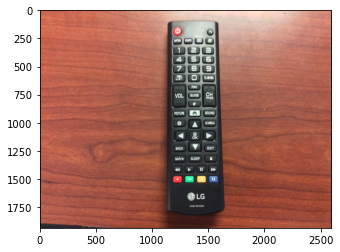

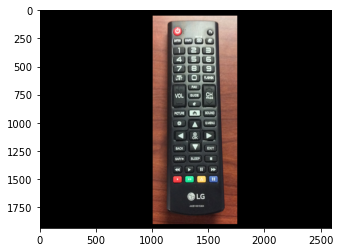

In [11]:
import skimage.io
import skimage.draw
import numpy as np
import matplotlib.pyplot as plt
image=skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/remote-control.jpg")
fig,ax=plt.subplots()
plt.imshow(image)
mask=np.ones(shape=image.shape[0:2],dtype='bool')
rr,cc=skimage.draw.rectangle(start=(50,1000),end=(1900,1750))
mask[rr,cc]=False
image[mask]=0
fig,ax=plt.subplots()
plt.imshow(image)

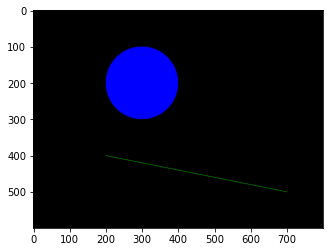

In [14]:
#OTHER DRAWING OPERATIONS
'''
Circles can be drawn with the skimage.draw.disk() function, which takes two parameters: 
the (ry, cx) point of the centre of the circle, and the radius of the circle. There is an optional shape 
parameter that can be supplied to this function. It will limit the output coordinates for cases where the 
circle dimensions exceed the ones of the image.

Lines can be drawn with the skimage.draw.line() function, which takes four parameters: 
the (ry, cx) coordinate of one end of the line, and the (ry, cx) coordinate of the other end of the line.
'''
#make an empty, black image with a size of 800x600 pixels:
import numpy as np
import skimage.draw
import skimage.io
import matplotlib.pyplot as plt
#create the black canvas
image=np.zeros(shape=(600,800,3), dtype="uint8")
# Draw a blue circle with centre (200, 300) in (ry, cx) coordinates, and radius 100
rr,cc=skimage.draw.disk(center=(200,300),radius=100,shape=image.shape[0:2])
image[rr,cc]=(0,0,255)
# Draw a green line from (400, 200) to (500, 700) in (ry, cx) coordinates
rr,cc=skimage.draw.line(r0=400,c0=200,r1=500,c1=700)
image[rr,cc]=(0,255,0)
# Display the image
fig,ax=plt.subplots()
plt.imshow(image)

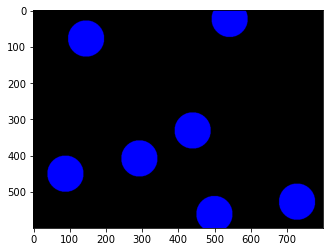

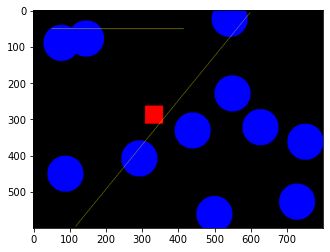

In [24]:
'''
if we wanted, to draw rectangles, circles and lines at random positions within our black canvas. To do 
this, we could use the random python module, and the function random.randrange, which can produce random 
numbers within a certain range.
'''
#Let’s draw 15 randomly placed circles:
#make an empty, black image with a size of 800x600 pixels:
import numpy as np
import skimage.draw
import skimage.io
import matplotlib.pyplot as plt
#create the black canvas
image=np.zeros(shape=(600,800,3), dtype="uint8")

import random
# create the black canvas
image=np.zeros(shape=(600,800,3),dtype="uint8")
# draw a blue circle at a random location 15 times
for i in range(7):
    rr,cc=skimage.draw.disk(center=(
         random.randrange(600),
         random.randrange(800)),
         radius=50,
         shape=image.shape[0:2],
        )
    image[rr,cc]=(0,0,255)
# display the results
fig,ax=plt.subplots()
plt.imshow(image)

#randomly choose whether to plot a rectangle, a circle, or a square. Again, we do this with the random 
#module, now using the function random.random that returns a random number between 0.0 and 1.0.
# Draw 15 random shapes (rectangle, circle or line) at random positions
for i in range(7):
    # generate a random number between 0.0 and 1.0 and use this to decide if we
    # want a circle, a line or a sphere
    x=random.random()
    if x<0.33:
        # draw a blue circle at a random location
        rr,cc=skimage.draw.disk(center=(
            random.randrange(600),
            random.randrange(800)),
            radius=50,
            shape=image.shape[0:2],
        )
        color=(0,0,255)
    elif x<0.66:
        # draw a green line at a random location
        rr,cc=skimage.draw.line(
            r0=random.randrange(600),
            c0=random.randrange(800),
            r1=random.randrange(600),
            c1=random.randrange(800),
        )
        color=(255,255,0)
    else:
        # draw a red rectangle at a random location
        rr,cc=skimage.draw.rectangle(
            start=(random.randrange(600),random.randrange(800)),
            extent=(50,50),
            shape=image.shape[0:2],
        )
        color=(255,0,0)
    image[rr,cc]=color
# display the results
fig,ax=plt.subplots()
plt.imshow(image)

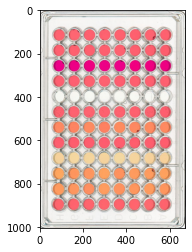

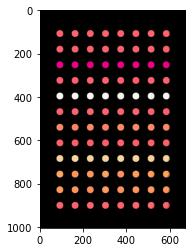

In [25]:
#Consider this image of a 96-well plate that has been scanned on a flatbed scanner.
#Suppose that we are interested in the colours of the solutions in each of the wells. We do not care about 
#the colour of the rest of the image, i.e., the plastic that makes up the well plate itself.

'''
If you spent some time looking at the contents of the data/centers.txt file from the previous challenge, 
you may have noticed that the centres of each well in the image are very regular. Assuming that the images 
are scanned in such a way that the wells are always in the same place, and that the image is perfectly 
oriented (i.e., it does not slant one way or another), we could produce our well plate mask without having 
to read in the coordinates of the centres of each well. Assume that the centre of the upper left well in 
the image is at location cx = 91 and ry = 108, and that there are 70 pixels between each centre in 
the cx dimension and 72 pixels between each centre in the ry dimension. Each well still has a radius of 16 
pixels. Write a Python program that produces the same output image as in the previous challenge, but 
without having to read in the centers.txt file. Hint: use nested for loops.
'''
import numpy as np
import skimage.draw
import skimage.io
import matplotlib.pyplot as plt
# Load the image
image = skimage.io.imread(fname="C:/Users/DEEP/Machine Learning/images/wellplate.jpg")
# Display the image
fig, ax = plt.subplots()
plt.imshow(image)
# create the mask image
mask = np.ones(shape=image.shape[0:2], dtype="bool")
# upper left well coordinates
cx0 = 91
ry0 = 108
# spaces between wells
deltaCX = 70
deltaRY = 72
cx = cx0
ry = ry0
# iterate each row and column
for row in range(12):
    # reset cx to leftmost well in the row
    cx = cx0
    for col in range(8):
        # ... and drawing a circle on the mask
        rr, cc = skimage.draw.disk(center=(ry, cx), radius=16, shape=image.shape[0:2])
        mask[rr, cc] = False
        cx += deltaCX
    # after one complete row, move to next row
    ry += deltaRY
# apply the mask
image[mask] = 0
# display the result
fig, ax = plt.subplots()
plt.imshow(image)